In [3]:
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=d7hrKGBal7v6PDUJ38BOT18HJC9IE2&access_type=offline&code_challenge=4KRu85W2TeIeWPWhO-olQSnYeUL0cZ59vxBEIaVrKos&code_challenge_method=S256


Credentials saved to file: [C:\Users\parke\AppData\Roaming\gcloud\application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "ucsb-capstone-2025" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project owning the resource.


Checking to see if we can load data directly from GCP

In [1]:
import os
from google.cloud import storage

# Initialize GCS client
storage_client = storage.Client()

# Update paths to GCS bucket paths
BUCKET_NAME = "music-caps"
SUNOCAPS_PATH = "FakeMusicCaps/SunoCaps"
DATASET_PATH = "FakeMusicCaps"

In [2]:
# Get a bucket
bucket = storage_client.bucket(BUCKET_NAME)

# Helper function to list files in GCS
def list_gcs_files(prefix):
    blobs = bucket.list_blobs(prefix=prefix)
    return [blob.name for blob in blobs]

# List available models/folders
print("Listing contents of bucket...")
models_names = ['MusicCaps', 'MusicGen_medium', 'musicldm', 'audioldm2', 'stable_audio_open', 'mustango']

# Print structure of data
for name in models_names:
    print(f"\nFiles in {name}:")
    model_files = list_gcs_files(f"{DATASET_PATH}/{name}")
    # print first 5 files as example
    for file_path in model_files[:5]:
        print(f"  - {file_path}")


Listing contents of bucket...

Files in MusicCaps:
  - FakeMusicCaps/MusicCaps/-0Gj8-vB1q4.wav
  - FakeMusicCaps/MusicCaps/-0SdAVK79lg.wav
  - FakeMusicCaps/MusicCaps/-0vPFx-wRRI.wav
  - FakeMusicCaps/MusicCaps/-0xzrMun0Rs.wav
  - FakeMusicCaps/MusicCaps/-1LrH01Ei1w.wav

Files in MusicGen_medium:
  - FakeMusicCaps/MusicGen_medium/-0Gj8-vB1q4.wav
  - FakeMusicCaps/MusicGen_medium/-0SdAVK79lg.wav
  - FakeMusicCaps/MusicGen_medium/-0vPFx-wRRI.wav
  - FakeMusicCaps/MusicGen_medium/-0xzrMun0Rs.wav
  - FakeMusicCaps/MusicGen_medium/-1LrH01Ei1w.wav

Files in musicldm:
  - FakeMusicCaps/musicldm/-0Gj8-vB1q4.wav
  - FakeMusicCaps/musicldm/-0SdAVK79lg.wav
  - FakeMusicCaps/musicldm/-0vPFx-wRRI.wav
  - FakeMusicCaps/musicldm/-0xzrMun0Rs.wav
  - FakeMusicCaps/musicldm/-1LrH01Ei1w.wav

Files in audioldm2:
  - FakeMusicCaps/audioldm2/-0Gj8-vB1q4.wav
  - FakeMusicCaps/audioldm2/-0SdAVK79lg.wav
  - FakeMusicCaps/audioldm2/-0vPFx-wRRI.wav
  - FakeMusicCaps/audioldm2/-0xzrMun0Rs.wav
  - FakeMusicCaps/au

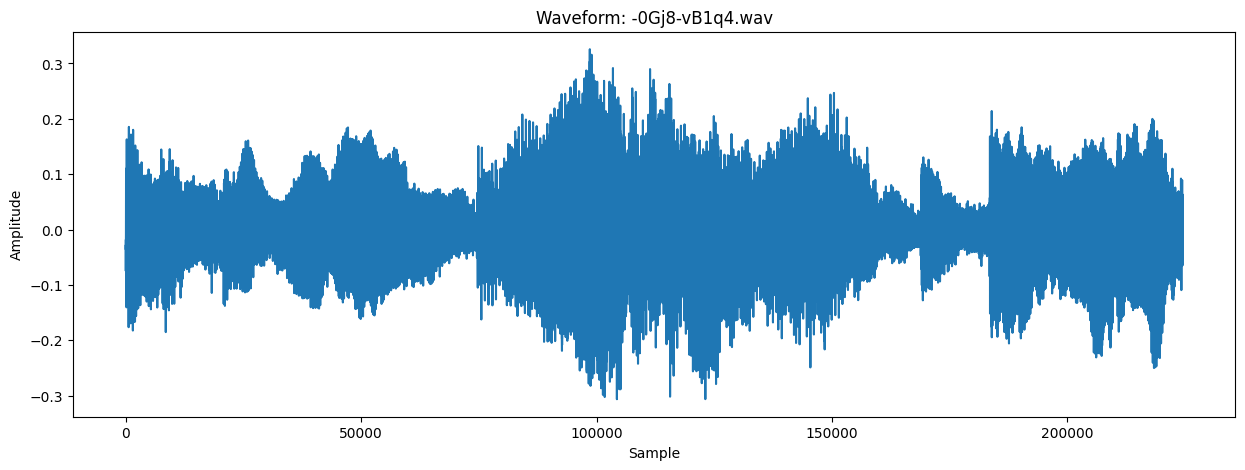

Sample rate: 22050 Hz
Duration: 10.18 seconds
Max amplitude: 0.33


In [6]:
import io
import tempfile
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from google.cloud import storage

def visualize_gcs_audio(bucket_name, file_path):
    # Get the blob
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(file_path)
    
    # Create a temporary file
    with tempfile.NamedTemporaryFile(suffix='.wav', delete=False) as temp_audio:
        # Download the audio data to the temporary file
        blob.download_to_filename(temp_audio.name)
        
        # Load audio with librosa
        audio_data, sample_rate = librosa.load(temp_audio.name)
        
    # Clean up the temporary file
    os.unlink(temp_audio.name)
    
    # Plot waveform
    plt.figure(figsize=(15, 5))
    plt.plot(audio_data)
    plt.title(f"Waveform: {file_path.split('/')[-1]}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()
    
    # Print audio info
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Duration: {len(audio_data)/sample_rate:.2f} seconds")
    print(f"Max amplitude: {np.max(np.abs(audio_data)):.2f}")

# Visualize the specific file
visualize_gcs_audio(BUCKET_NAME, file_path) 